[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/bigdata_analyst_cert/blob/main/part2/ch4/ch4_regression.ipynb)

# 1.문제정의
- 도서 참고

# 2. 라이브러리 및 데이터 불러오기

In [63]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch4/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part2/ch4/test.csv")

# 3. 탐색적 데이터 분석(EDA)

In [64]:
train.shape, test.shape

((6818, 12), (1705, 11))

In [65]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [67]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

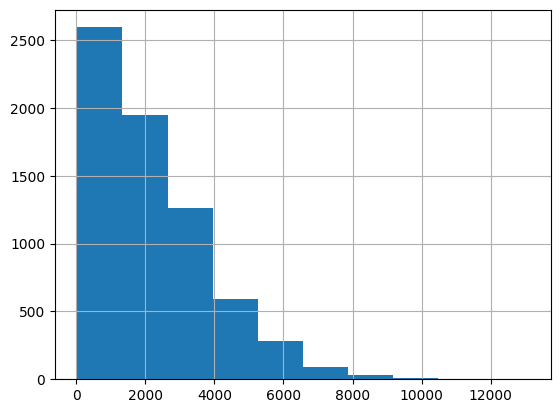

In [68]:
train['Item_Outlet_Sales'].hist()

In [69]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [70]:
test.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705,1705,1705,1705,1235,1705,1705
unique,1077,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,4,997,272,207,565,686,1103


In [71]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1162
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1940
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  301
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  470
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

# 4. 데이터 전처리

In [73]:
list(train.columns[train.dtypes == object])

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [74]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [75]:
target = train.pop('Item_Outlet_Sales')
print(train.shape, test.shape)
df = pd.concat([train, test])
print(df.shape)

(6818, 11) (1705, 11)
(8523, 11)


In [76]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [60]:
# 심화학습 (레이블 인코딩 다른 방법)
# for col in cols:
#     df[col] = df[col].astype("category").cat.codes
#     print(f"{col} 레이블 인코딩 완료")

In [77]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,NCR06,12.500,1,0.006760,9,42.8112,1,1987,0,2,1
1,FDW11,12.600,1,0.048741,1,60.4194,1,1987,0,2,1
2,FDH32,12.800,1,0.075997,6,97.1410,1,1987,0,2,1
3,FDL52,6.635,2,0.046351,5,37.4506,2,2007,3,1,1
4,FDO09,13.500,2,0.125170,13,261.4910,1,1987,0,2,1


In [78]:
train = df.iloc[:len(train)].copy()
test = df.iloc[len(train):].copy()
train.shape, test.shape

((6818, 11), (1705, 11))

In [79]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(train['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [80]:
print(train.shape, test.shape)
train.drop('Item_Identifier', axis=1, inplace=True)
test.drop('Item_Identifier', axis=1, inplace=True)
print(train.shape, test.shape)

(6818, 11) (1705, 11)
(6818, 10) (1705, 10)


# 5. 검증 데이터 분할

In [81]:
# 검증 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5454, 10), (1364, 10), (5454,), (1364,))

# 6. 머신러닝 학습 및 평가

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def rmse(y_val, y_pred):
    return mean_squared_error(y_val, y_pred)**0.5

In [83]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

result = mean_squared_error(y_val, y_pred)
print('MSE:', result)

result = mean_absolute_error(y_val, y_pred)
print('MAE:', result)

result = r2_score(y_val, y_pred)
print('R2:', result)

result = rmse(y_val, y_pred)
print('RMSE:', result)

MSE: 1282923.0729833888
MAE: 865.1968401416273
R2: 0.5058168396924845
RMSE: 1132.6619411737065


In [84]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

result = mean_squared_error(y_val, y_pred)
print('MSE:', result)

result = mean_absolute_error(y_val, y_pred)
print('MAE:', result)

result = r2_score(y_val, y_pred)
print('R2:', result)

result = rmse(y_val, y_pred)
print('RMSE:', result)

MSE: 1101802.8117346708
MAE: 747.2971172067448
R2: 0.5755845326933362
RMSE: 1049.6679530854844


In [85]:
# LightGBM
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=0, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

result = mean_squared_error(y_val, y_pred)
print('MSE:', result)

result = mean_absolute_error(y_val, y_pred)
print('MAE:', result)

result = r2_score(y_val, y_pred)
print('R2:', result)

result = rmse(y_val, y_pred)
print('RMSE:', result)

MSE: 1115654.3482227568
MAE: 736.6367966578568
R2: 0.5702489079618556
RMSE: 1056.2454015155554


# 7. 예측 및 결과 파일 생성

In [86]:
pred = model.predict(test)
pred

array([1226.50504175,  830.18920951, 1788.76644309, ..., 3666.34876099,
        990.65125496, 1224.1960178 ])

In [87]:
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv", index=False)

In [88]:
pd.read_csv("result.csv")

,pred
0,1226.505042
1,830.189210
2,1788.766443
3,1644.510784
4,2831.798098
...,...
1700,285.648607
1701,481.591492
1702,3666.348761
1703,990.651255
